# Numerical Differentiation

Trong giải tích toán học, đạo hàm của một hàm số là một đại lượng **mô tả sự biến thiên** của hàm tại một điểm nào đó. Đạo hàm là một khái niệm cơ bản trong giải tích. Chẳng hạn, trong vật lý, đạo hàm biểu diễn vận tốc tức thời của một chất điểm chuyển động


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Derivative

Đạo hàm(derivative) của 1 hàm số(function) $f(x)$ tại $x=a$ là giới hạn (limit)

$$
f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}
$$

## Difference Formulas (Công thức tính sự khác biệt)

There are 3 main [difference formulas]
Ba loại của sự khác biệt hữu hạn. Sự khác biệt trung tâm về x cho phép gần đúng nhất của đạo hàm của hàm tại x.

![diff type](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Finite_difference_method.svg/2560px-Finite_difference_method.svg.png)

The *forward difference formula* with step size $h$ is

$$
f'(a) \approx \frac{f(a + h) - f(a)}{h}
$$

The *backward difference formula* with step size $h$ is

$$
f'(a) \approx \frac{f(a) - f(a - h)}{h}
$$

The *central difference formula* with step size $h$ is trung bình của the forward và backwards difference formulas

$$
f'(a) \approx \frac{1}{2} \left( \frac{f(a + h) - f(a)}{h} + \frac{f(a) - f(a - h)}{h} \right) = \frac{f(a + h) - f(a - h)}{2h}
$$

## Implementation

Hãy viết 1 hàm tên là `derivative` có các tham số đầu vào `f`, `a`, `method` và `h` (với giá trị mặc định là `method='central'` and `h=0.01`) and trả về công thức tính độ chênh lệch tương ứng $f'(a)$ với step size $h$.

In [2]:
def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method phải là 'central', 'forward' hoặc 'backward'.")

Test hàm vừa viết với một số hàm cơ bản. For example, we know

$$
\left. \frac{d}{dx} \left( \cos x \right) \, \right|_{x=0} = -\sin(0) = 0
$$

Tính thử

In [5]:
print("Kiểu dữ liệu của function: ", np.cos)
kq = derivative(np.cos,0)
print("ket qua tinh dao ham la: ", kq)

Kiểu dữ liệu của function:  <ufunc 'cos'>
ket qua tinh dao ham la:  0.0


In [4]:
derivative(np.cos,0,method='forward',h=1e-8)

0.0

We also know

$$
\left. \frac{d}{dx} \left( e^x \right) \, \right|_{x=0} = e^0 = 1
$$

and we compute

In [5]:
derivative(np.exp,0,h=0.0001)

1.0000000016668897

In [6]:
derivative(np.exp,0,method='backward',h=0.0001)


0.9999500016666385

In [13]:
x = np.linspace(0,10,10)
g = np.arange(1, 10)
print("x=",   x)
print("g=", g)

x= [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
g= [1 2 3 4 5 6 7 8 9]


Notice that our function can take an array of inputs for $a$ and return the derivatives for each $a$ value. For example, we can plot the derivative of $\sin(x)$:

[ 0.          0.1586663   0.31733259  0.47599889  0.63466518  0.79333148
  0.95199777  1.11066407  1.26933037  1.42799666  1.58666296  1.74532925
  1.90399555  2.06266184  2.22132814  2.37999443  2.53866073  2.69732703
  2.85599332  3.01465962  3.17332591  3.33199221  3.4906585   3.6493248
  3.8079911   3.96665739  4.12532369  4.28398998  4.44265628  4.60132257
  4.75998887  4.91865516  5.07732146  5.23598776  5.39465405  5.55332035
  5.71198664  5.87065294  6.02931923  6.18798553  6.34665183  6.50531812
  6.66398442  6.82265071  6.98131701  7.1399833   7.2986496   7.45731589
  7.61598219  7.77464849  7.93331478  8.09198108  8.25064737  8.40931367
  8.56797996  8.72664626  8.88531256  9.04397885  9.20264515  9.36131144
  9.51997774  9.67864403  9.83731033  9.99597663 10.15464292 10.31330922
 10.47197551 10.63064181 10.7893081  10.9479744  11.10664069 11.26530699
 11.42397329 11.58263958 11.74130588 11.89997217 12.05863847 12.21730476
 12.37597106 12.53463736 12.69330365 12.85196995 13.

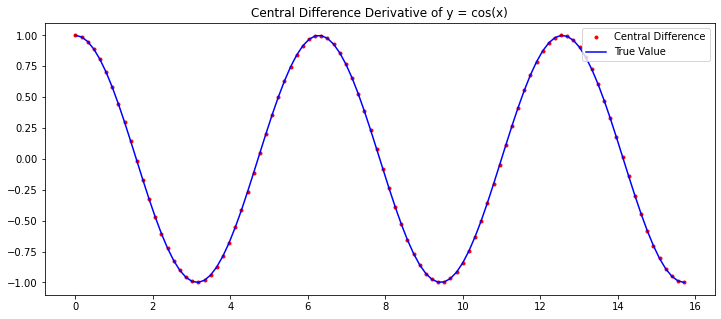

In [16]:
x = np.linspace(0,5*np.pi,100)
print(x)
dydx = derivative(np.sin,x)
print("tinh dao ham: ", dydx)
dYdx = np.cos(x)

plt.figure(figsize=(12,5))
plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,dYdx,'b',label='True Value')

plt.title('Central Difference Derivative of y = cos(x)')
plt.legend(loc='best')
plt.show()

Let's compute and plot the derivative of a complicated function

$$
y=\left(\frac{4x^2+2x+1}{x+2e^x}\right)^x
$$

kiểu dữ liệu của f:  <function <lambda> at 0x7fe62d1a8ca0>


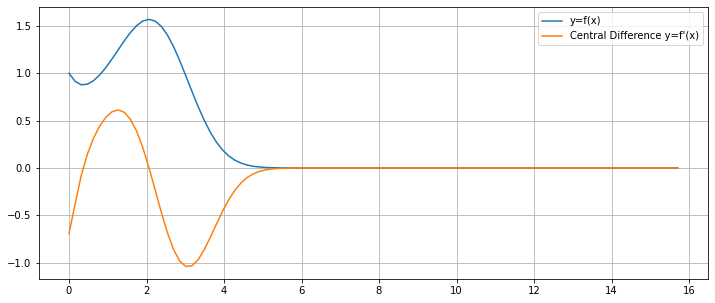

In [20]:

f = lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x
print("kiểu dữ liệu của f: ",  f)
y = f(x)
dydx = derivative(f,x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Central Difference y=f'(x)")
plt.legend()
plt.grid(True)

plt.show()

## Error Formulas
    
Chúng ta có 1 câu hỏi: giá trị gần đúng được đưa ra bởi các công thức forward, backwards and central difference tốt như thế nào? Chúng  ta dự trên công thức [Taylor's Theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem).


- Khai  triển taylor dùng để sấp sỉ 1 hàm số khả vi bởi 1 đa thức tại 1 điểm cho trước

- **Hàm số khả vi**
một hàm số khả vi của một biến số thực là một hàm có đạo hàm tại tất cả các điểm thuộc miền xác định của nó.
---

**Theorem.** Khai triển bậc $n$ đa  thức Taylor của $f(x)$ at $x=a$ như sau:

$$
f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2}(x-a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(x-a)^n + \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}
$$

Với $c$ between $x$ and $a$. Cần nó vì nó gần đúng nên cần thêm vào (same bias)

---

**Theorem.** Lỗi của công thức forward difference là:

$$
\left| \, \frac{f(a+h) - f(a)}{h} - f'(a) \, \right| \leq \frac{hK_2}{2}
$$

Ở đây ta có $\left| \, f''(x) \, \right| \leq K_2$ for all $x \in [a,a+h]$. ($ K_2 $ 2  là đạo  hàm bậc 2) Điều này tương tự với the backward difference formula.

*Bằng chứng*. Nhìn vào công thức taylor bậc 1:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(c)}{2}(x-a)^{2}
$$

Thay $x = a+h$ vào công thức bên trên và viết lại

\begin{align}
f(a+h) &= f(a) + f'(a)h + \frac{f''(c)}{2}h^{2} \\\
f(a+h) - f(a) &= f'(a)h + \frac{f''(c)}{2}h^{2} \\\
\frac{f(a+h) - f(a)}{h} &= f'(a) + \frac{f''(c)}{2}h \\\
\frac{f(a+h) - f(a)}{h} - f'(a) &= \frac{f''(c)}{2}h
\end{align}

Let $K_2$ such that $\left| \, f''(x) \, \right| \leq K_2$ for all $x \in [a,a+h]$ and we see the result.

---

**Theorem.** The central difference formula error is:

$$
\left| \frac{f(a+h) - f(a-h)}{2h} - f'(a) \right| \leq \frac{h^2K_3}{6}
$$

where $|f'''(x)| \leq K_3$ for all $x \in [a-h,a+h]$.

*Proof*. Look at the Taylor polynomial of degree 2:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2}(x-a)^2 + \frac{f'''(c)}{6}(x-a)^{3}
$$

Let $x = a + h$ and also $x = a - h$ and write:

\begin{align}
f(a+h) &= f(a) + f'(a)h + \frac{f''(a)}{2}h^2 + \frac{f'''(c_1)}{6}h^{3} \\\
f(a-h) &= f(a) - f'(a)h + \frac{f''(a)}{2}h^2 - \frac{f'''(c_2)}{6}h^{3} \\\
f(a+h) - f(a-h) &= 2 f'(a)h + \frac{f'''(c_1)}{6}h^{3} + \frac{f'''(c_2)}{6}h^{3} \\\
\frac{f(a+h) - f(a-h)}{2h} - f'(a) &= \frac{f'''(c_1) + f'''(c_2)}{12}h^{2}
\end{align}

Chú ý rằng $f'''(x)$ là liên tục (by giả thiết) and $(f'''(c_1) + f'''(c_2))/2$ is between $f'''(c_1)$ and $f'''(c_2)$ and và tồn  tại 1 $c$ between $c_1$ and $c_2$ such that

$$
f'''(c) = \frac{f'''(c_1) + f'''(c_2)}{2}
$$

by the Intermediate Value Theorem. Let $K_3$ such that $\left| \, f'''(x) \, \right| \leq K_3$ for all $x \in [a-h,a+h]$ and we see the result.

---

## scipy.misc.derivative

The [SciPy](https://scipy.org/) function `scipy.misc.derivative` computes derivatives using the central difference formula.

In [9]:
from scipy.misc import derivative

In [10]:
x = np.arange(0,5)
derivative(np.exp,x,dx=0.1)

array([ 1.0016675 ,  2.72281456,  7.40137735, 20.11902956, 54.68919246])

## Higher Order Derivatives

*Under construction*

## Examples

### Taylor series

Let's plot the Taylor polynomial $T_3(x)$ of degree 3 centered at $x=0$ for $f(x) = \frac{3e^x}{x^2 + x + 1}$ over the interval $x \in [-3,3]$. First, let's plot the graph $y=f(x)$:

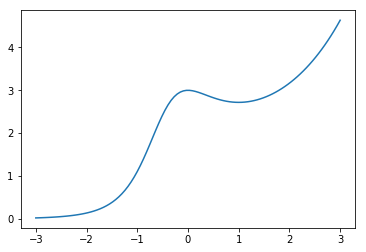

In [11]:
x = np.linspace(-3,3,100)
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)
y = f(x)
plt.plot(x,y);
plt.show()

Let's compute the coefficients $a_n = \frac{f^{(n)}(0)}{n!}$ for $n=0,1,2,3$:

In [12]:
a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=2) / 2
a3 = derivative(f,0,dx=0.001,n=3,order=5) / 6
# The parameter order specifies the number of points to use
# The value order must be odd and at least n + 1

print(a0,a1,a2,a3)

3.0 1.9999983891239026e-06 -1.50000037502096 1.9999920608526622


Finally, let's plot $f(x)$ and $T_3(x)$ together:

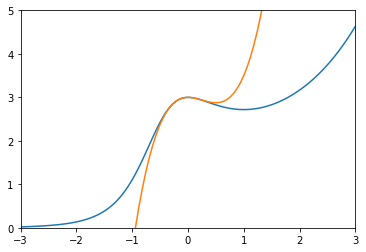

In [13]:
T3 = a0 + a1*x + a2*x**2 + a3*x**3
plt.plot(x,y,x,T3), plt.xlim([-3,3]), plt.ylim([0,5]);
plt.show()

### Arc length (Độ  dài cung)

![image](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/2332/2018/01/11213108/CNX_Calc_Figure_06_04_001.jpg)



Viết 1 hàm called `arc_length` which takes parameters `f`, `a`, `b`, `h` and `N` and returns an approximation of the arc length of $f(x)$ from $a$ to $b$

$$
L \approx \int_a^b \sqrt{ 1 + \left( f'(x) \right)^2 } dx
$$

hàm sử dụng quy tắc hình thang (`scipy.integrate.trapz`) to estimate the integral and the central difference formula to approximate $f'(x)$. Note that we can't use the central difference formula at the endpoints because they use $x$ values outside the interval $[a,b]$ and our function may not be defined there.

In [ ]:
import scipy.integrate as spi

def arc_length(f,a,b,h=0.001,N=1000):
    '''Approximate the arc length of y=f(x) from x=a to x=b.

    Parameters
    ----------
    f : (vectorized) function of one variable
    a,b : numbers defining the interval [a,b]
    h : step size to use in difference formulas
    N : number of subintervals in trapezoid method

    Returns
    -------
    Approximation of the integral \int_a^b \sqrt{1 + (f'(x))^2} dx
    representing the arc length of y=f(x) from x=a to x=b.
    '''
    x = np.linspace(a,b,N+1)
    y = f(x)

    # Compute central difference formula for x_k for 1 &lt;= k &lt;= N-1
    h = np.min([h,(b-a)/N]) # Make sure that h is smaller than the size of the subintervals
    x_interior = x[1:-1]
    df_interior = (f(x_interior + h) - f(x_interior - h))/(2*h)

    # Use forward/backward difference formula at the endpoints
    df_a = (f(a + h) - f(a))/h
    df_b = (f(b) - f(b - h))/h
    df = np.hstack([[df_a],df_interior,[df_b]])

    # Compute values of the integrand in arc length formula
    y = np.sqrt(1 + df**2)

    # Compute the integral
    L = spi.trapz(y,x)

    return L

Let's test our function with input where we know the exact output. For example, the arc length of $f(x)=x$ from $a=0$ to $b=1$ is $L=\sqrt{2}$ and we compute

In [15]:
arc_length(lambda x: x,0,1)

1.4142135623730958

and compare with the exact value

In [16]:
np.sqrt(2)

1.4142135623730951

The arc length of $f(x)=\sqrt{1 - x^2}$ from $a=0$ to $b=\frac{1}{\sqrt{2}}$ is $L=\frac{\pi}{4}$ and we compute

In [17]:
arc_length(lambda x: np.sqrt(1 - x**2),0,1/np.sqrt(2))

0.7853980801486478

and compare to the exact value

In [18]:
np.pi/4

0.7853981633974483

The arc length of $f(x)=\frac{2x^{3/2}}{3}$ from $a=0$ to $b=1$ is $L = \frac{2}{3}\left( 2^{3/2} - 1 \right)$ and we compute

In [19]:
arc_length(lambda x: 2*(x**(3/2))/3,0,1,h=10**(-10),N=10**5)

1.2189514473615233

and compare to the exact value

In [20]:
(2/3)*(2**(3/2) - 1)

1.2189514164974602

## Exercises

1. Dùng `derivative` để tính giá trị và hiển thị đạo hàm  ở dạng đồ thị của hàm $f'(x)$  với 

    $$
    f(x) = \frac{7x^3-5x+1}{2x^4+x^2+1} \ , \ x \in [-5,5]
    $$
